In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.utils.data as tud
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  #gpu
# device = torch.device("cpu")

# Mnist数据集

In [2]:
mnist_data = datasets.MNIST("./mnist_data", train=True, download=False,
                            transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,),std=(0.5,))  #就会把tensor变成(-1,1)而不是用真实的均值和方差normalize
                            ]))
batch_size = 32
data_loader = tud.DataLoader(mnist_data, batch_size=batch_size,shuffle=True)

# （1）配置网络

In [3]:
image_size = 28*28
hidden_size = 256

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),#1：二分类问题，对和不对
    nn.LeakyReLU(0.2),
    nn.Sigmoid()
)

latent_size= 64
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, image_size),
    nn.Tanh()
)
D = D.to(device)
G = G.to(device)

# (2)定义损失函数

In [4]:
loss_fn = nn.BCELoss()

# (3)定义优化策略

In [5]:
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0003)

# 训练网络

In [6]:
total_steps = len(data_loader)
num_epochs = 30
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, _) in enumerate(data_loader):
        batch_size = images.shape[0]
        images = images.reshape(batch_size, image_size).to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        outputs = D(images)
        d_loss_real = loss_fn(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = loss_fn(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        outputs = D(fake_images)
        g_loss = loss_fn(outputs, real_labels)
        g_score = outputs
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        if i % 100 ==0:  #generator的score比较高的话效果就会比较好 一直上升   #拓展：提高效果
            print("Epoch [{}/{}], Step [ {}/{} ], d_loss: {:.4f}, g_loss: {:.4f},g_score: {:.4f} "#加g_score
              .format(epoch, num_epochs, i, len(data_loader), d_loss.item(), g_loss.item(), g_score.sum()))

0
Epoch [0/30], Step [ 0/1875 ], d_loss: 1.3321, g_loss: 0.6988,g_score: 15.9095 
Epoch [0/30], Step [ 100/1875 ], d_loss: 0.7806, g_loss: 0.7466,g_score: 15.1786 
Epoch [0/30], Step [ 200/1875 ], d_loss: 0.6161, g_loss: 0.8984,g_score: 13.0585 
Epoch [0/30], Step [ 300/1875 ], d_loss: 0.5605, g_loss: 0.9609,g_score: 12.2630 
Epoch [0/30], Step [ 400/1875 ], d_loss: 0.6731, g_loss: 0.8373,g_score: 13.8704 
Epoch [0/30], Step [ 500/1875 ], d_loss: 1.8184, g_loss: 0.9839,g_score: 12.0440 
Epoch [0/30], Step [ 600/1875 ], d_loss: 0.5035, g_loss: 1.0720,g_score: 10.9974 
Epoch [0/30], Step [ 700/1875 ], d_loss: 0.6999, g_loss: 0.8894,g_score: 13.2312 
Epoch [0/30], Step [ 800/1875 ], d_loss: 0.7513, g_loss: 0.8621,g_score: 13.5916 
Epoch [0/30], Step [ 900/1875 ], d_loss: 0.6101, g_loss: 0.8937,g_score: 13.1233 
Epoch [0/30], Step [ 1000/1875 ], d_loss: 1.0044, g_loss: 0.7282,g_score: 15.4710 
Epoch [0/30], Step [ 1100/1875 ], d_loss: 1.3401, g_loss: 0.7183,g_score: 16.0382 
Epoch [0/30], 

Epoch [5/30], Step [ 500/1875 ], d_loss: 1.6081, g_loss: 0.9813,g_score: 12.2643 
Epoch [5/30], Step [ 600/1875 ], d_loss: 0.8441, g_loss: 0.8210,g_score: 14.2994 
Epoch [5/30], Step [ 700/1875 ], d_loss: 1.3739, g_loss: 0.9578,g_score: 12.5054 
Epoch [5/30], Step [ 800/1875 ], d_loss: 0.8789, g_loss: 0.8225,g_score: 14.2722 
Epoch [5/30], Step [ 900/1875 ], d_loss: 1.4461, g_loss: 0.8786,g_score: 13.4944 
Epoch [5/30], Step [ 1000/1875 ], d_loss: 1.4061, g_loss: 0.8262,g_score: 14.1896 
Epoch [5/30], Step [ 1100/1875 ], d_loss: 0.9827, g_loss: 0.9409,g_score: 12.5903 
Epoch [5/30], Step [ 1200/1875 ], d_loss: 1.0863, g_loss: 0.8838,g_score: 13.5041 
Epoch [5/30], Step [ 1300/1875 ], d_loss: 1.3908, g_loss: 0.9146,g_score: 12.9565 
Epoch [5/30], Step [ 1400/1875 ], d_loss: 1.1645, g_loss: 0.8673,g_score: 13.7530 
Epoch [5/30], Step [ 1500/1875 ], d_loss: 1.1730, g_loss: 0.7860,g_score: 14.7774 
Epoch [5/30], Step [ 1600/1875 ], d_loss: 1.1527, g_loss: 0.8933,g_score: 13.2992 
Epoch [5/

Epoch [10/30], Step [ 1000/1875 ], d_loss: 1.1765, g_loss: 0.8558,g_score: 13.9218 
Epoch [10/30], Step [ 1100/1875 ], d_loss: 1.1332, g_loss: 0.9226,g_score: 13.0643 
Epoch [10/30], Step [ 1200/1875 ], d_loss: 1.1032, g_loss: 0.9276,g_score: 12.8961 
Epoch [10/30], Step [ 1300/1875 ], d_loss: 1.2705, g_loss: 0.8345,g_score: 14.2900 
Epoch [10/30], Step [ 1400/1875 ], d_loss: 1.1922, g_loss: 0.9461,g_score: 12.8012 
Epoch [10/30], Step [ 1500/1875 ], d_loss: 1.1762, g_loss: 1.0424,g_score: 11.5492 
Epoch [10/30], Step [ 1600/1875 ], d_loss: 1.3449, g_loss: 0.7069,g_score: 16.2984 
Epoch [10/30], Step [ 1700/1875 ], d_loss: 0.9963, g_loss: 0.9502,g_score: 12.5784 
Epoch [10/30], Step [ 1800/1875 ], d_loss: 1.4149, g_loss: 0.9144,g_score: 13.1745 
11
Epoch [11/30], Step [ 0/1875 ], d_loss: 1.1719, g_loss: 0.8307,g_score: 14.4370 
Epoch [11/30], Step [ 100/1875 ], d_loss: 1.0217, g_loss: 1.0542,g_score: 11.7154 
Epoch [11/30], Step [ 200/1875 ], d_loss: 1.4162, g_loss: 0.8720,g_score: 13.

Epoch [15/30], Step [ 1400/1875 ], d_loss: 1.0837, g_loss: 0.8577,g_score: 14.1814 
Epoch [15/30], Step [ 1500/1875 ], d_loss: 1.2338, g_loss: 0.9165,g_score: 13.0893 
Epoch [15/30], Step [ 1600/1875 ], d_loss: 1.0694, g_loss: 0.8048,g_score: 14.7971 
Epoch [15/30], Step [ 1700/1875 ], d_loss: 1.0883, g_loss: 0.9582,g_score: 12.5742 
Epoch [15/30], Step [ 1800/1875 ], d_loss: 1.0263, g_loss: 0.8822,g_score: 13.6319 
16
Epoch [16/30], Step [ 0/1875 ], d_loss: 1.3239, g_loss: 0.9509,g_score: 12.5851 
Epoch [16/30], Step [ 100/1875 ], d_loss: 1.1719, g_loss: 1.1112,g_score: 10.9270 
Epoch [16/30], Step [ 200/1875 ], d_loss: 0.9267, g_loss: 0.9183,g_score: 13.0609 
Epoch [16/30], Step [ 300/1875 ], d_loss: 1.4264, g_loss: 0.9564,g_score: 12.8024 
Epoch [16/30], Step [ 400/1875 ], d_loss: 1.0920, g_loss: 1.0234,g_score: 12.0942 
Epoch [16/30], Step [ 500/1875 ], d_loss: 1.2960, g_loss: 1.0451,g_score: 11.5920 
Epoch [16/30], Step [ 600/1875 ], d_loss: 1.1406, g_loss: 0.9252,g_score: 13.1451

Epoch [20/30], Step [ 1800/1875 ], d_loss: 1.0940, g_loss: 1.0138,g_score: 11.8648 
21
Epoch [21/30], Step [ 0/1875 ], d_loss: 1.0637, g_loss: 1.0299,g_score: 11.7828 
Epoch [21/30], Step [ 100/1875 ], d_loss: 1.2292, g_loss: 0.9500,g_score: 12.8178 
Epoch [21/30], Step [ 200/1875 ], d_loss: 1.4978, g_loss: 0.8510,g_score: 14.1483 
Epoch [21/30], Step [ 300/1875 ], d_loss: 1.1489, g_loss: 0.9017,g_score: 13.2771 
Epoch [21/30], Step [ 400/1875 ], d_loss: 0.9977, g_loss: 1.0163,g_score: 12.0922 
Epoch [21/30], Step [ 500/1875 ], d_loss: 1.2677, g_loss: 1.2138,g_score: 9.8299 
Epoch [21/30], Step [ 600/1875 ], d_loss: 1.1653, g_loss: 1.0303,g_score: 12.2180 
Epoch [21/30], Step [ 700/1875 ], d_loss: 1.1352, g_loss: 1.1213,g_score: 10.8420 
Epoch [21/30], Step [ 800/1875 ], d_loss: 1.0482, g_loss: 0.8486,g_score: 14.2806 
Epoch [21/30], Step [ 900/1875 ], d_loss: 1.4221, g_loss: 1.1527,g_score: 10.6390 
Epoch [21/30], Step [ 1000/1875 ], d_loss: 0.9066, g_loss: 0.8690,g_score: 13.8285 
Ep

Epoch [26/30], Step [ 300/1875 ], d_loss: 1.0241, g_loss: 1.0984,g_score: 10.9588 
Epoch [26/30], Step [ 400/1875 ], d_loss: 1.2243, g_loss: 1.0681,g_score: 11.2808 
Epoch [26/30], Step [ 500/1875 ], d_loss: 1.3257, g_loss: 0.8357,g_score: 14.5061 
Epoch [26/30], Step [ 600/1875 ], d_loss: 1.0536, g_loss: 0.9619,g_score: 12.7478 
Epoch [26/30], Step [ 700/1875 ], d_loss: 1.1186, g_loss: 0.9305,g_score: 13.3117 
Epoch [26/30], Step [ 800/1875 ], d_loss: 1.1298, g_loss: 0.9557,g_score: 12.5060 
Epoch [26/30], Step [ 900/1875 ], d_loss: 0.8065, g_loss: 0.9821,g_score: 12.1472 
Epoch [26/30], Step [ 1000/1875 ], d_loss: 1.2474, g_loss: 0.8134,g_score: 14.8300 
Epoch [26/30], Step [ 1100/1875 ], d_loss: 1.0397, g_loss: 1.0549,g_score: 11.4830 
Epoch [26/30], Step [ 1200/1875 ], d_loss: 1.2453, g_loss: 1.1277,g_score: 10.7307 
Epoch [26/30], Step [ 1300/1875 ], d_loss: 1.2758, g_loss: 0.8533,g_score: 13.9299 
Epoch [26/30], Step [ 1400/1875 ], d_loss: 1.1048, g_loss: 0.8907,g_score: 13.5916 

# 展示生成效果

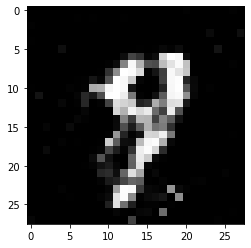

In [7]:
z=torch.randn(batch_size,latent_size).to(device)
fake_images=G(z)
#print(fake_images.shape)
fake_images=fake_images.view(batch_size,28,28).data.cpu().numpy()
plt.imshow(fake_images[0],cmap=plt.cm.gray)
#camp=plt.cm.gray

# 存储模型

In [8]:
torch.save(G.state_dict(),"mnist_genator.pth")
torch.save(D.state_dict(),"mnist_discriminator.pth")

# 加载保存的生成器模型

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=784, bias=True)
  (3): Tanh()
)


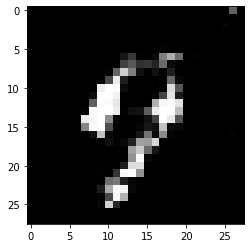

In [9]:
model = G
model.load_state_dict(torch.load("mnist_genator.pth"))
print(model)
z=torch.randn(batch_size,latent_size).to(device)
fake_images=model(z)
fake_images2=fake_images.view(batch_size,28,28).data.cpu().numpy()
plt.imshow(fake_images2[0],cmap=plt.cm.gray)

# 加载保存的判别器模型

In [10]:
model_D = D
model_D.load_state_dict(torch.load("mnist_discriminator.pth"))
print(model_D)
# print(fake_images)
# z=torch.randn(batch_size,latent_size).to(device)
print(fake_images[0].shape)
images = fake_images.reshape(batch_size, image_size).to(device)
outputs = model_D(images)
g_score = outputs
print(g_score.sum())

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=1, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Sigmoid()
)
torch.Size([784])
tensor(15.3018, device='cuda:0', grad_fn=<SumBackward0>)


# 扩展：DCGAN

Iter: 0, D: 1.392, G:0.9872
Iter: 250, D: 1.067, G:0.9394
Iter: 500, D: 1.156, G:0.855
Iter: 750, D: 0.9131, G:0.9985
Iter: 1000, D: 1.075, G:1.274
Iter: 1250, D: 1.131, G:1.939
Iter: 1500, D: 1.027, G:1.318
Iter: 1750, D: 0.9796, G:1.68


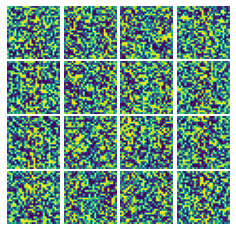

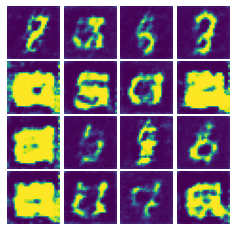

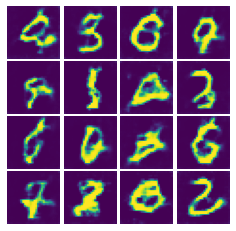

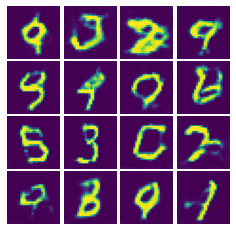

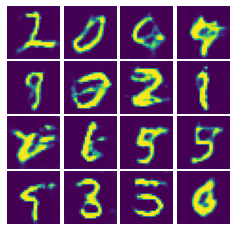

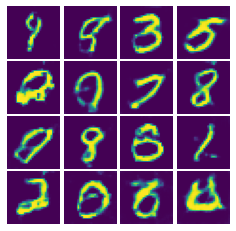

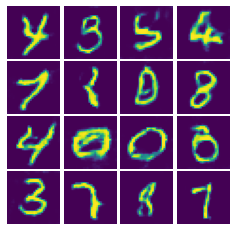

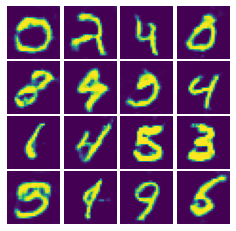

In [11]:
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, sampler
from torchvision.datasets import MNIST

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torchvision.transforms as tfs

NUM_TRAIN = 50000
NUM_VAL = 5000

NOISE_DIM = 96
batch_size = 128


class ChunkSampler(sampler.Sampler): # 定义一个取样的函数
    """Samples elements sequentially from some offset. 
    Arguments:
        num_samples: # of desired datapoints
        start: offset where we should start selecting from
    """
    def __init__(self, num_samples, start=0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples

def show_images(images): # 定义画图工具
    images = np.reshape(images, [images.shape[0], -1])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return 


def preprocess_img(x):
    x = tfs.ToTensor()(x)
    return (x - 0.5) / 0.5

def deprocess_img(x):
    return (x + 1.0) / 2.0

class build_dc_classifier(nn.Module):
    def __init__(self):
        super(build_dc_classifier, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 5, 1),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 5, 1),
            nn.LeakyReLU(0.01),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.LeakyReLU(0.01),
            nn.Linear(1024, 1)
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

class build_dc_generator(nn.Module): 
    def __init__(self, noise_dim=NOISE_DIM):
        super(build_dc_generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(noise_dim, 1024),
            nn.ReLU(True),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 7 * 7 * 128),
            nn.ReLU(True),
            nn.BatchNorm1d(7 * 7 * 128)
        )
        
        self.conv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 1, 4, 2, padding=1),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.shape[0], 128, 7, 7) # reshape 通道是 128，大小是 7x7
        x = self.conv(x)
        return x

bce_loss = nn.BCEWithLogitsLoss()

def discriminator_loss(logits_real, logits_fake): # 判别器的 loss
    size = logits_real.shape[0]
    true_labels = Variable(torch.ones(size, 1)).float()
    false_labels = Variable(torch.zeros(size, 1)).float()
    loss = bce_loss(logits_real, true_labels) + bce_loss(logits_fake, false_labels)
    return loss

def generator_loss(logits_fake): # 生成器的 loss  
    size = logits_fake.shape[0]
    true_labels = Variable(torch.ones(size, 1)).float()
    loss = bce_loss(logits_fake, true_labels)
    return loss

# 使用 adam 来进行训练，学习率是 3e-4, beta1 是 0.5, beta2 是 0.999
def get_optimizer(net):
    optimizer = torch.optim.Adam(net.parameters(), lr=3e-4, betas=(0.5, 0.999))
    return optimizer

def train_dc_gan(D_net, G_net, D_optimizer, G_optimizer, discriminator_loss, generator_loss, show_every=250, 
                noise_size=96, num_epochs=10):
    iter_count = 0
    for epoch in range(num_epochs):
        for x, _ in train_data:
            bs = x.shape[0]
            # 判别网络
            real_data = Variable(x) # 真实数据
            logits_real = D_net(real_data) # 判别网络得分
            
            sample_noise = (torch.rand(bs, noise_size) - 0.5) / 0.5 # -1 ~ 1 的均匀分布
            g_fake_seed = Variable(sample_noise)
            fake_images = G_net(g_fake_seed) # 生成的假的数据
            logits_fake = D_net(fake_images) # 判别网络得分

            d_total_error = discriminator_loss(logits_real, logits_fake) # 判别器的 loss
            D_optimizer.zero_grad()
            d_total_error.backward()
            D_optimizer.step() # 优化判别网络
            
            # 生成网络
            g_fake_seed = Variable(sample_noise)
            fake_images = G_net(g_fake_seed) # 生成的假的数据

            gen_logits_fake = D_net(fake_images)
            g_error = generator_loss(gen_logits_fake) # 生成网络的 loss
            G_optimizer.zero_grad()
            g_error.backward()
            G_optimizer.step() # 优化生成网络

            if (iter_count % show_every == 0):
                print('Iter: {}, D: {:.4}, G:{:.4}'.format(iter_count, d_total_error.item(), g_error.item()))
                imgs_numpy = deprocess_img(fake_images.data.cpu().numpy())
                show_images(imgs_numpy[0:16])
                plt.savefig("Iter-{}-DCGAN.png".format(iter_count))
            iter_count += 1


train_set = MNIST('./mnist_data', train=True, download=True, transform=preprocess_img)

train_data = DataLoader(train_set, batch_size=batch_size, sampler=ChunkSampler(NUM_TRAIN, 0))

val_set = MNIST('./mnist_data', train=True, download=True, transform=preprocess_img)

val_data = DataLoader(val_set, batch_size=batch_size, sampler=ChunkSampler(NUM_VAL, NUM_TRAIN))


D_DC = build_dc_classifier()
G_DC = build_dc_generator()

D_DC_optim = get_optimizer(D_DC)
G_DC_optim = get_optimizer(G_DC)

train_dc_gan(D_DC, G_DC, D_DC_optim, G_DC_optim, discriminator_loss, generator_loss, num_epochs=5)